## Clustering Methods

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

#### Distance

In [104]:
data = pd.DataFrame({"x1":[1,2,3,5,0,2], "x2":[1,4,2,3,2,5]})
data

,x1,x2
0,1,1
1,2,4
2,3,2
3,5,3
4,0,2
5,2,5


In [105]:
# 유클리디안 거리, 두 점 사이를 잇는 직선거리
# L2 거리, MSE
squareform(pdist(data, metric='euclidean'))

array([[0.        , 3.16227766, 2.23606798, 4.47213595, 1.41421356,
        4.12310563],
       [3.16227766, 0.        , 2.23606798, 3.16227766, 2.82842712,
        1.        ],
       [2.23606798, 2.23606798, 0.        , 2.23606798, 3.        ,
        3.16227766],
       [4.47213595, 3.16227766, 2.23606798, 0.        , 5.09901951,
        3.60555128],
       [1.41421356, 2.82842712, 3.        , 5.09901951, 0.        ,
        3.60555128],
       [4.12310563, 1.        , 3.16227766, 3.60555128, 3.60555128,
        0.        ]])

In [106]:
# 두 점 사이의 거리를 좌표값 차이의 절대값의 합
# L1 거리, MAE
squareform(pdist(data, metric='cityblock'))

array([[0., 4., 3., 6., 2., 5.],
       [4., 0., 3., 4., 4., 1.],
       [3., 3., 0., 3., 3., 4.],
       [6., 4., 3., 0., 6., 5.],
       [2., 4., 3., 6., 0., 5.],
       [5., 1., 4., 5., 5., 0.]])

In [107]:
# 확률 분포를 고려한 거리
# 회전(Rotation)과 척도(Scale)에 의해 자료를 변환하여 공분산행렬을 I로 만드는 효과
squareform(pdist(data, metric='mahalanobis'))

array([[0.        , 2.03943424, 1.22880257, 2.45760514, 1.03050808,
        2.71935866],
       [2.03943424, 0.        , 1.65797883, 2.08767983, 1.60198991,
        0.70161003],
       [1.22880257, 1.65797883, 0.        , 1.22880257, 1.79878277,
        2.32816537],
       [2.45760514, 2.08767983, 1.22880257, 0.        , 2.90330907,
        2.54277564],
       [1.03050808, 1.60198991, 1.79878277, 2.90330907, 0.        ,
        2.14646241],
       [2.71935866, 0.70161003, 2.32816537, 2.54277564, 2.14646241,
        0.        ]])

### Hierarchical clustering

#### Single linkage Method

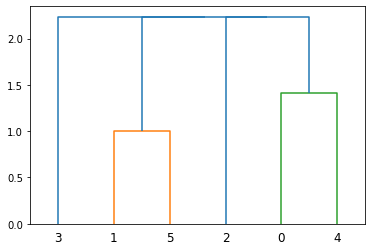

In [108]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# 가장 짧은 거리를 군집의 거리로 정의
clust_single = linkage(data, method='single')

dendrogram(clust_single)
plt.show()

In [109]:
np.round(squareform(pdist(data, metric='euclidean')),2)

array([[0.  , 3.16, 2.24, 4.47, 1.41, 4.12],
       [3.16, 0.  , 2.24, 3.16, 2.83, 1.  ],
       [2.24, 2.24, 0.  , 2.24, 3.  , 3.16],
       [4.47, 3.16, 2.24, 0.  , 5.1 , 3.61],
       [1.41, 2.83, 3.  , 5.1 , 0.  , 3.61],
       [4.12, 1.  , 3.16, 3.61, 3.61, 0.  ]])

#### Complete linkage method

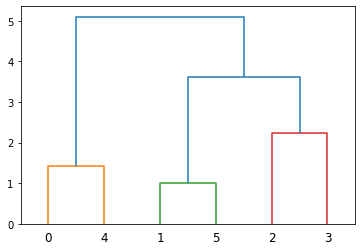

In [110]:
# 가장 긴 거리를 군집의 거리로 정의
clust_complete = linkage(data, method='complete')

dendrogram(clust_complete)
plt.show()

#### Average linkage method

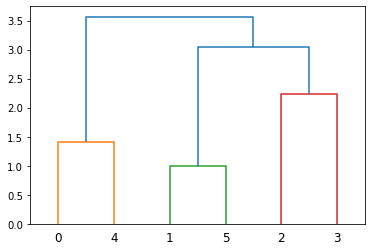

In [111]:
# 거리의 평균을 군집의 거리로 정의
clust_avg = linkage(data, method='average')

dendrogram(clust_avg)
plt.show()

#### Ward's method

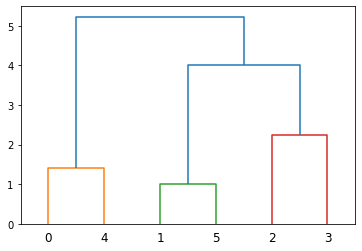

In [112]:
# 매 단계에서 군집 간 정보의 손실을 최소화 하도록 군집
# 비슷한 크기의 군집을 생성, 비계층적 군집화 방법과 비슷한 결과를 생성
clust_ward = linkage(data, method='ward')

dendrogram(clust_ward)
plt.show()

#### Number of Clusters

In [113]:
# cut_tree 함수로 군집 분석의 해를 얻을 수 있음
cut_tree(clust_ward, 3)

array([[0],
       [1],
       [2],
       [2],
       [0],
       [1]])

#### US Arrests Example

In [114]:
data_path = "./data/"
usarrests = pd.read_csv(data_path + "USArrests.csv", index_col=0)

usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [115]:
usarrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


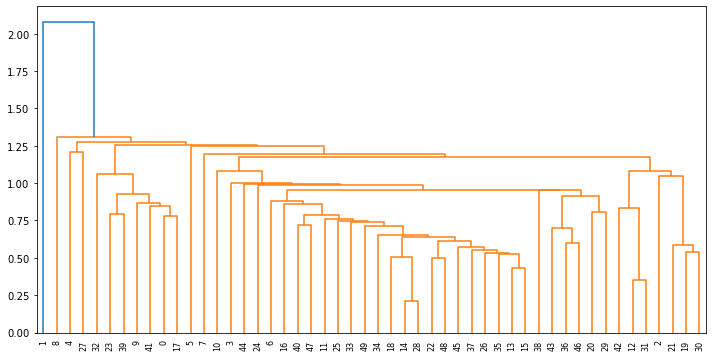

In [116]:
from sklearn.preprocessing import StandardScaler

usarrests_s = StandardScaler().fit_transform(usarrests)
usarrests_s = pd.DataFrame(usarrests_s, columns=usarrests.columns, index=usarrests.index)

hc_single = linkage(usarrests_s, method="single")

plt.figure(figsize = (12,6))
dendrogram(hc_single)
plt.show()

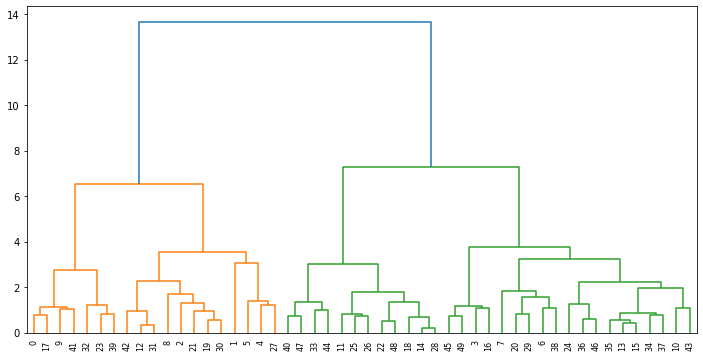

In [117]:
hc_ward = linkage(usarrests_s, method="ward")

plt.figure(figsize = (12,6))
dendrogram(hc_ward)
plt.show()

In [118]:
# 군집의 개수가 4개가 되도록 Dendrogram을 잘라 Cluster 할당

cluster = cut_tree(hc_ward, 4) # ward method의 결과를 4개의 군집으로 분할
usarrests['cluster'] = cluster # 50개의 변수에 대해 4개의 클러스터로 할당
usarrests.cluster = usarrests.cluster.astype('category') # 범주형으로 변환
usarrests.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [119]:
# 각 군집에 몇 개의 관측치가 들어가 있는지 확인
# 4 개의 군집으로 구분하기로한 뒤, 구분했을 때, 한 군집에 너무 적은 관측치가 포함된다면, 군집의 개수를 늘려봐야 함
usarrests.cluster.value_counts()

2    19
1    12
3    12
0     7
Name: cluster, dtype: int64

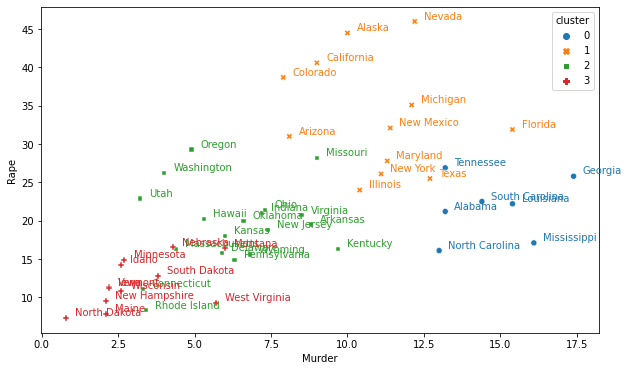

In [120]:
# 변수 간의 Scatterplot으로 군집 특성 파악

# 4 개의 변수 중 2 개만을 활용해 그렸지만, 각 변수에 대해 그려볼 수 있음
plt.figure(figsize=(10,6))
sns.scatterplot(x="Murder", y="Rape", hue="cluster", style="cluster", data=usarrests)
for i in range(usarrests.shape[0]): # 그림 위에 주의 이름을 써줌
    plt.text(x=usarrests.Murder[i]+0.3, # Murder의 약간 오른쪽에
            y=usarrests.Rape[i]+0.3, # Rape의 약간 위에
            s=usarrests.index[i], # 텍스트는 데이터의 인덱스를 사용
            color=sns.color_palette()[usarrests.cluster[i]]) # 클러스터의 색과 맞춤
plt.show()

- Murder와 Rape에 대해, 3번 클러스터는 둘 다 작음
- 2번 클러스터는 중간
- 1번은 둘 다 많음
- 0번은 Rape에 비해 Murder 비율이 높음

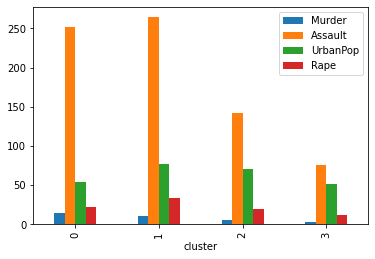

In [121]:
# 각 군집의 변수 값의 평균을 비교하여 군집의 특성 파악

usarrests.groupby('cluster').mean().plot.bar() #원변수로 그렸기 때문에, 비교가 어려우므로 표준화된 변수로 그리면 비교가 편함
plt.show()

### Non-hierarchical Clustering

#### k-means Clutering

In [122]:
from sklearn.cluster import KMeans
import warnings; warnings.filterwarnings('ignore')
km = KMeans(n_clusters=4).fit(usarrests_s) # 큰 데이터를 k-means할 때는 batch 단위로 진행하는 것도 고려할 수 있다

usarrests_s['cluster_km']=km.labels_
usarrests_s['cluster_km']=usarrests_s['cluster_km'].astype('category')

usarrests_s.cluster_km.value_counts()

0    16
1    13
2    13
3     8
Name: cluster_km, dtype: int64

In [123]:
km.labels_ # 4개의 군집으로 나눠진 레이블

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [124]:
km.cluster_centers_ # 4개의 클러스터에 각각의 센터

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [125]:
# 각 그룹의 중심으로부터 각 그룹의 관측치를 뺀 뒤, 제곱의 합
# within-group distance는 작은 것이 좋음
# between-group은 먼 것이 좋음
km.inertia_ # within-group sum-of-square의 합

57.55425863091104

In [126]:
km.n_clusters

4

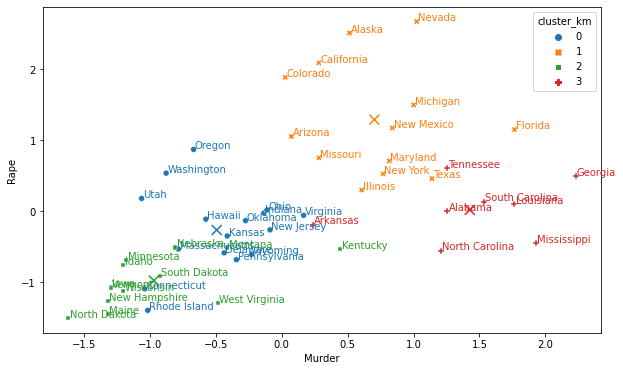

In [127]:
# 중심값을 활용해 클러스터의 성질을 비교해볼 수 있음
plt.figure(figsize=(10,6))
sns.scatterplot(x="Murder", y="Rape", hue="cluster_km", style="cluster_km", data=usarrests_s)
for i in range(usarrests_s.shape[0]):
    plt.text(x=usarrests_s.Murder[i]+0.01, 
            y=usarrests_s.Rape[i]+0.01,
            s=usarrests_s.index[i],
            color=sns.color_palette()[usarrests_s.cluster_km[i]])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,3], marker="x", s=100,
            color=sns.color_palette()[:4]) # 각 클러스터의 센터(중심값)를 표시
plt.show()

In [128]:
# K-means에서는 k를 미리 결정해야함
wss=[]
for k in np.arange(1,20): # 클러스터 갯수 1에서부터 19까지 순환
    km_k = KMeans(n_clusters=k).fit(usarrests_s) # 1에서부터 갯수를 증가시키면서 k-means를 진행
    wss.append(km_k.inertia_) # inertia를 계산

In [129]:
wss

[257.62000000000006,
 154.42577658232392,
 99.21426668994418,
 57.55425863091104,
 51.511635686881085,
 46.88266043652851,
 40.761023510218095,
 37.369093918872764,
 32.56019444057509,
 29.5649059202181,
 27.613732514474037,
 24.13605328175634,
 22.31532546319039,
 20.65029788716345,
 18.975445620390627,
 17.36511600698637,
 16.017436771976953,
 15.35544405591408,
 13.987102967573463]

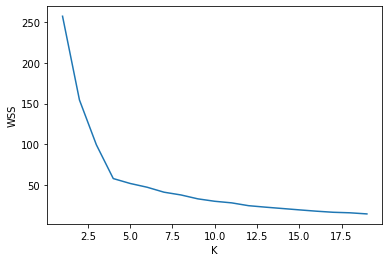

In [130]:
# inertia가 급격히 감소하는 위치에서 k를 결정
plt.plot(np.arange(1,20),wss)
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()

### Model-based Clustering : Gaussian Mixture Model

In [177]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, covariance_type='full').\
fit(usarrests_s.iloc[:,:-1]) # k_means 클러스터링 열 제거
# n_components의 default는 1 = 군집을 만들지 않음

In [132]:
# 4 개 그룹에 대해 4 개의 변수에 대한 평균
gmm.means_ # mu_k

array([[-0.33193186, -0.09506483,  0.17409614,  0.39532356],
       [ 1.10447472,  1.10989555,  0.15924443,  0.81120286],
       [-0.64546893, -0.3026992 ,  1.14863792, -0.6476626 ],
       [-0.73974495, -0.96357684, -0.62308672, -0.76065515]])

In [133]:
# covariances_ = covariance matrix
# 앞의 4는 component, 뒤의 (4, 4) 는 Sigma_k의 Dimension
gmm.covariances_.shape # Sigma_k

(4, 4, 4)

In [134]:
usarrests_s.head()

,Murder,Assault,UrbanPop,Rape,cluster_km
Alabama,1.255179,0.790787,-0.526195,-0.003451,3
Alaska,0.513019,1.118060,-1.224067,2.509424,1
Arizona,0.072361,1.493817,1.009122,1.053466,1
Arkansas,0.234708,0.233212,-1.084492,-0.186794,3
California,0.281093,1.275635,1.776781,2.088814,1


In [135]:
gmm.bic(usarrests_s.iloc[:,:-1])

595.1950376037184

In [146]:
# Model Selection

# spherical = 가장 모수가 적어도 되는, 각자 서로 다른 분산을 가지며, 공분산행렬이 identity matrix 이기 때문에 둥글게 생김
# 6개의 군집일 때, BIC가 가장 작음
bic=[]
lowest_bic = np.infty
n_components_range = range(1, 7) # 하나부터 7개까지의 군집 수
cv_types = ['spherical', 'tied', 'diag', 'full'] # 시그마에 대한 가정
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type,
                             random_state = 1000) # random_state 가 바뀌면 결과가 바뀜 (initial value에 따라 값이 달라짐)
        gmm.fit(usarrests_s.iloc[:,:4])
        bic.append(gmm.bic(usarrests_s.iloc[:,:4]))
        if bic[-1] < lowest_bic:  
            lowest_bic = bic[-1] # BIC가 가장 작을 때의 BIC 값
            best_gmm = gmm       # 그 때의 모형
            print(n_components, cv_type)

1 spherical
2 spherical
3 spherical
1 tied


In [172]:
# Dimension이 4이므로, 4개의 Dimension에 대해 각 그룹의 평균 Vector
best_gmm.means_

array([[-1.06581410e-16,  1.06581410e-16, -4.61852778e-16,
         8.43769499e-16]])

In [173]:
best_gmm.covariances_ # 각각의 숫자 * identity matrix = 해당 component(각 집단)의 공분산행렬

array([[1.000001  , 0.80187331, 0.06957262, 0.56357883],
       [0.80187331, 1.000001  , 0.2588717 , 0.66524123],
       [0.06957262, 0.2588717 , 1.000001  , 0.41134124],
       [0.56357883, 0.66524123, 0.41134124, 1.000001  ]])

In [178]:
# 최적의 모형에서 나온 클러스터 할당
usarrests_s['cluster_gmm']=best_gmm.predict(usarrests_s.iloc[:,:4]) # 각 관측치에 대한 클러스터 할당
usarrests_s['cluster_gmm']=usarrests_s['cluster_gmm'].astype('category')

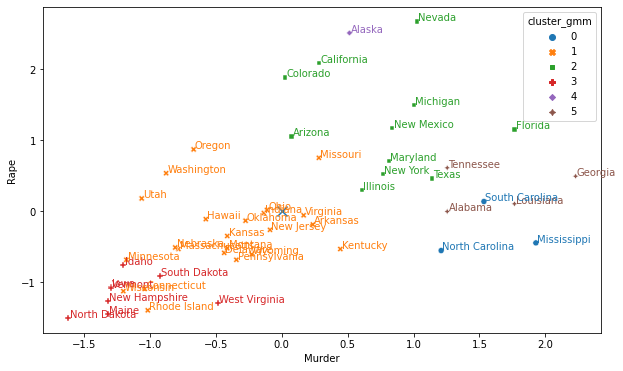

In [179]:
# Alaska는 하나밖에 없으므로 아웃라이어와 같이 성격이 다른 관측치로 볼 수 있음
plt.figure(figsize=(10,6))
sns.scatterplot(x="Murder", y="Rape", hue="cluster_gmm", style="cluster_gmm", data=usarrests_s)
for i in range(usarrests_s.shape[0]):
    plt.text(x=usarrests_s.Murder[i]+0.01, 
            y=usarrests_s.Rape[i]+0.01,
            s=usarrests_s.index[i],
            color=sns.color_palette()[usarrests_s.cluster_gmm[i]])
plt.scatter(best_gmm.means_[:,0],best_gmm.means_[:,3], marker="x", s=100, # 각 집단의 중심값
            color=sns.color_palette()[:best_gmm.n_components])
plt.show()

### Density-based Clutsering

#### DBSCAN

In [168]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=2)
cluster_dbscan = dbscan.fit_predict(usarrests_s)

In [169]:
usarrests_s['cluster_dbscan']= cluster_dbscan
usarrests_s['cluster_dbscan'] = usarrests_s['cluster_dbscan'].astype('category')

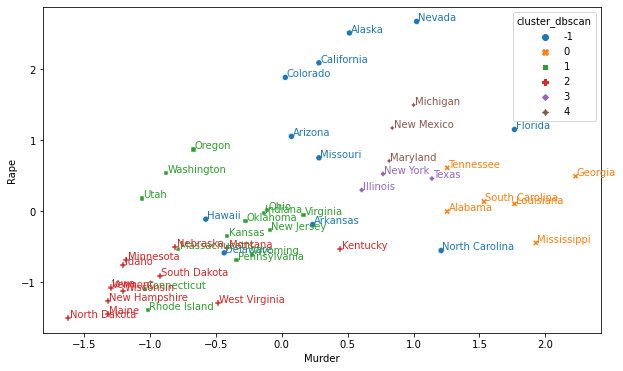

In [170]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Murder", y="Rape", hue="cluster_dbscan", style="cluster_dbscan", data=usarrests_s)
for i in range(usarrests_s.shape[0]):
    plt.text(x=usarrests_s.Murder[i]+0.01, 
            y=usarrests_s.Rape[i]+0.01,
            s=usarrests_s.index[i],
            color=sns.color_palette()[usarrests_s.cluster_dbscan[i]+1])
plt.show()
# 0~4 : 할당된 클러스터
# -1 : Noise sample